# What jobs?

# Load the data

In [39]:
import json

DEVICE = 'ibm_torino'
state = "Z0"
ROUNDS = 50


SOFT_MUL = 0.5

# file_name = f'../results/{state}_{ROUNDS}.json'
file_name = f'../results/2BIT_{DEVICE}_{state}_{ROUNDS}_soft_{SOFT_MUL}_v2.json'


with open(file_name, 'r') as f:
    decoding_data = json.load(f)

print(len(decoding_data.keys()))

1


# Get the cummulative error dict

In [40]:
import numpy as np

d_new_dict = {}
for key, result_list in decoding_data.items():
    for result in result_list:
        if result.get("totshots", 0) != 0:
            shots = result["totshots"]
            continue
        else:
            d_new = int(result["d_new"])
            error_list = result["error_list"]
            nb_subsets = len(error_list)
            mean_err = np.mean(error_list)
        if d_new in d_new_dict:
            d_new_dict[d_new]["mean_err_per_bit"] += mean_err
            d_new_dict[d_new]["shots"] += shots * nb_subsets
        else:
            d_new_dict[d_new] = {
                "mean_err_per_bit": mean_err,
                "shots": shots * nb_subsets,
            }

print(d_new_dict.keys())
print(d_new_dict)

err_rate_dict = {}

for d_new, data in d_new_dict.items():
    err_rate_dict[d_new] = data["mean_err_per_bit"] / data["shots"] 

print(err_rate_dict)

dict_keys([55, 51, 47, 43, 39, 35, 31, 27, 23, 19, 15, 11, 7, 3])
{55: {'mean_err_per_bit': 0.0, 'shots': 55920}, 51: {'mean_err_per_bit': 0.0, 'shots': 55920}, 47: {'mean_err_per_bit': 1.0, 'shots': 55920}, 43: {'mean_err_per_bit': 2.0, 'shots': 55920}, 39: {'mean_err_per_bit': 3.5, 'shots': 55920}, 35: {'mean_err_per_bit': 8.5, 'shots': 55920}, 31: {'mean_err_per_bit': 15.5, 'shots': 55920}, 27: {'mean_err_per_bit': 29.333333333333332, 'shots': 83880}, 23: {'mean_err_per_bit': 52.0, 'shots': 83880}, 19: {'mean_err_per_bit': 153.0, 'shots': 111840}, 15: {'mean_err_per_bit': 319.75, 'shots': 111840}, 11: {'mean_err_per_bit': 598.5, 'shots': 167760}, 7: {'mean_err_per_bit': 1379.9, 'shots': 279600}, 3: {'mean_err_per_bit': 3426.285714285714, 'shots': 782880}}
{55: 0.0, 51: 0.0, 47: 1.78826895565093e-05, 43: 3.57653791130186e-05, 39: 6.258941344778254e-05, 35: 0.00015200286123032904, 31: 0.00027718168812589414, 27: 0.0003497059291050707, 23: 0.000619933237958989, 19: 0.001368025751072961

# Plot

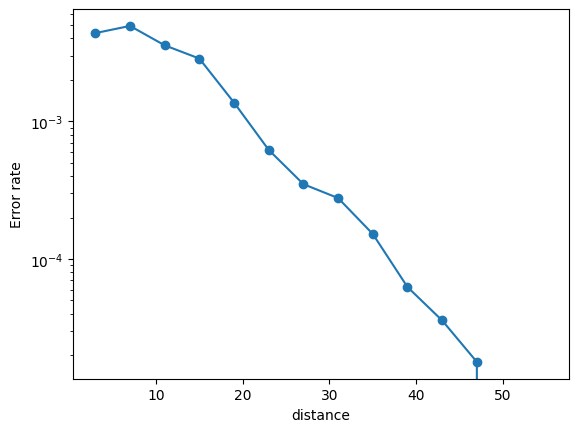

In [41]:
import matplotlib.pyplot as plt

plt.plot(err_rate_dict.keys(), err_rate_dict.values(), 'o-')
plt.ylabel('Error rate')
plt.xlabel('distance')
plt.yscale('log')